In [42]:
pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [44]:
president_speech = open('speech_moon.txt', encoding = 'UTF-8').read()

In [45]:
import re

In [46]:
president_speech = re.sub('[^가-힣]', ' ', president_speech)

In [47]:
import konlpy
hannanum = konlpy.tag.Hannanum()

In [48]:
hannanum.pos("대한민국의 영토는 한반도와 그 부속도서로 한다.")

[('대한민국', 'N'),
 ('의', 'J'),
 ('영토', 'N'),
 ('는', 'J'),
 ('한반도', 'N'),
 ('와', 'J'),
 ('그', 'M'),
 ('부속도서', 'N'),
 ('로', 'J'),
 ('하', 'P'),
 ('ㄴ다', 'E'),
 ('.', 'S')]

In [49]:
hannanum.tagset

{'E': '어미',
 'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ET': '전성 어미',
 'F': '외국어',
 'I': '독립언',
 'II': '감탄사',
 'J': '관계언',
 'JC': '격조사',
 'JP': '서술격 조사',
 'JX': '보조사',
 'M': '수식언',
 'MA': '부사',
 'MM': '관형사',
 'N': '체언',
 'NB': '의존명사',
 'NC': '보통명사',
 'NN': '수사',
 'NP': '대명사',
 'NQ': '고유명사',
 'P': '용언',
 'PA': '형용사',
 'PV': '동사',
 'PX': '보조 용언',
 'S': '기호',
 'X': '접사',
 'XP': '접두사',
 'XS': '접미사'}

In [50]:
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [51]:
hannanum.morphs("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '의', '영토', '는', '한반도', '와', '그', '부속도서', '로', '하', 'ㄴ다']

In [52]:
nouns = hannanum.nouns(president_speech)
nouns[:20]

['정권교체',
 '정치교체',
 '시대교체',
 '불비불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '년',
 '동안',
 '새',
 '한번',
 '하늘',
 '끝',
 '한번',
 '천지',
 '동안',
 '정치',
 '거리',
 '암울한']

In [63]:
import pandas as pd
df_word = pd.DataFrame( {'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [64]:
df_word['word_n'] = df_word['word'].str.len()
df_word

,word,word_n
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [65]:
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

,word,word_n
752,가동,2
1164,가사,2
275,가슴,2
1356,가슴,2
1179,가족,2
...,...,...
195,희망,2
1015,희망,2
1074,희망,2
1128,희생,2


In [66]:
df_word = df_word.groupby('word', as_index=False) \
.agg(n = ('word', 'count')) \
.sort_values('n', ascending=False)
df_word


,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


In [67]:
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


<AxesSubplot:xlabel='n', ylabel='word'>

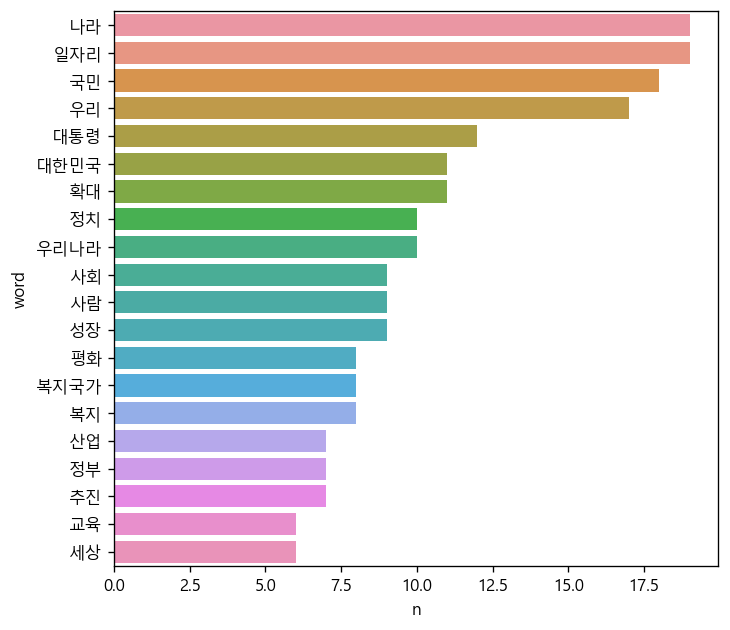

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update( {'font.family' : 'malgun Gothic',
                      'figure.dpi' : '120',
                      'figure.figsize' : [6.5, 6]})
sns.barplot(data=top20, y='word',x='n')

In [69]:
df_word['word_n'] = df_word['word'].str.len()
df_word

,word,n,word_n
153,나라,19,2
462,일자리,19,3
116,국민,18,2
422,우리,17,2
198,대통령,12,3
...,...,...,...
278,북핵문제,1,4
279,분단,1,2
281,분야,1,2
283,분쟁,1,2


In [70]:
df_word = df_word.query('word_n >= 2')
df_word.sort_values('word')

,word,n,word_n
0,가동,1,2
1,가사,1,2
2,가슴,2,2
3,가족,1,2
4,가족구조,1,4
...,...,...,...
705,훗날,1,2
706,휴전선,1,3
707,흡수,1,2
708,희망,4,2


In [71]:
df_word = df_word.groupby('word', as_index=False)\
    .agg(n = ('word', 'count'))\
    .sort_values('n', ascending=False)

In [72]:
!pip install wordcloud

In [73]:
font =  'DoHyeon-Regular.ttf'

In [74]:
df_word.head()

,word,n
0,가동,1
444,이득,1
468,자녀들,1
469,자리,1
470,자본,1


In [75]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'가동': 1,
 '이득': 1,
 '자녀들': 1,
 '자리': 1,
 '자본': 1,
 '자본주': 1,
 '자식': 1,
 '자신': 1,
 '자영업': 1,
 '자영업자들': 1,
 '자원': 1,
 '자율성': 1,
 '자체': 1,
 '자회담': 1,
 '잠자리': 1,
 '잠재력': 1,
 '잠재적': 1,
 '잣대': 1,
 '장기요양보험': 1,
 '재개': 1,
 '재벌': 1,
 '입장': 1,
 '입시부담': 1,
 '입시': 1,
 '인도': 1,
 '이불': 1,
 '이상': 1,
 '이외': 1,
 '이유': 1,
 '이익': 1,
 '이행': 1,
 '인간': 1,
 '인간답': 1,
 '인력': 1,
 '일할': 1,
 '인식': 1,
 '인정': 1,
 '인터넷': 1,
 '일대': 1,
 '일본': 1,
 '일부': 1,
 '일자리': 1,
 '일자리점검': 1,
 '재벌집단': 1,
 '재분배': 1,
 '재생': 1,
 '정조대왕': 1,
 '정규직': 1,
 '정당한': 1,
 '정도': 1,
 '정보통신': 1,
 '정부': 1,
 '정부구조': 1,
 '정의': 1,
 '정의로운': 1,
 '정책': 1,
 '정권': 1,
 '정책과정': 1,
 '정책수단': 1,
 '정치': 1,
 '정치교체': 1,
 '정치민주화': 1,
 '정치인': 1,
 '제공': 1,
 '제안': 1,
 '정권교체': 1,
 '점검': 1,
 '재생에너지': 1,
 '전기자동차': 1,
 '재정지출': 1,
 '재촉': 1,
 '재편': 1,
 '저것': 1,
 '저하': 1,
 '적극': 1,
 '적극적': 1,
 '적용': 1,
 '전반': 1,
 '젊은이들': 1,
 '전세계': 1,
 '전장': 1,
 '전쟁': 1,
 '전진': 1,
 '전환': 1,
 '절박': 1,
 '절박한': 1,
 '절실': 1,
 '이명박': 1,
 '이념': 1,
 '조세정의': 1,
 '의지': 1,
 '아래': 1,
 '아이': 1,
 '아이들'

In [76]:
from wordcloud import WordCloud

In [77]:
wc = WordCloud(random_state = 1234,
                font_path = font,
                width = 400,
                height = 400,
                background_color = 'white')
img_wordcloud = wc.generate_from_frequencies(dic_word)

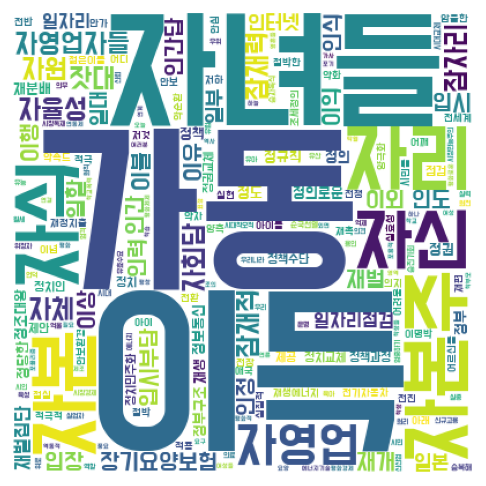

In [78]:
plt.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(img_wordcloud)

In [79]:
import PIL
from PIL import Image
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [80]:
icon = PIL.Image.open('cr7.png')

In [81]:
icon.show()

In [82]:
img = np.array(icon)

In [83]:
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
contour_width=3,
              contour_color='steelblue',
              background_color='white',
              mask = img)
type(wc)

wordcloud.wordcloud.WordCloud

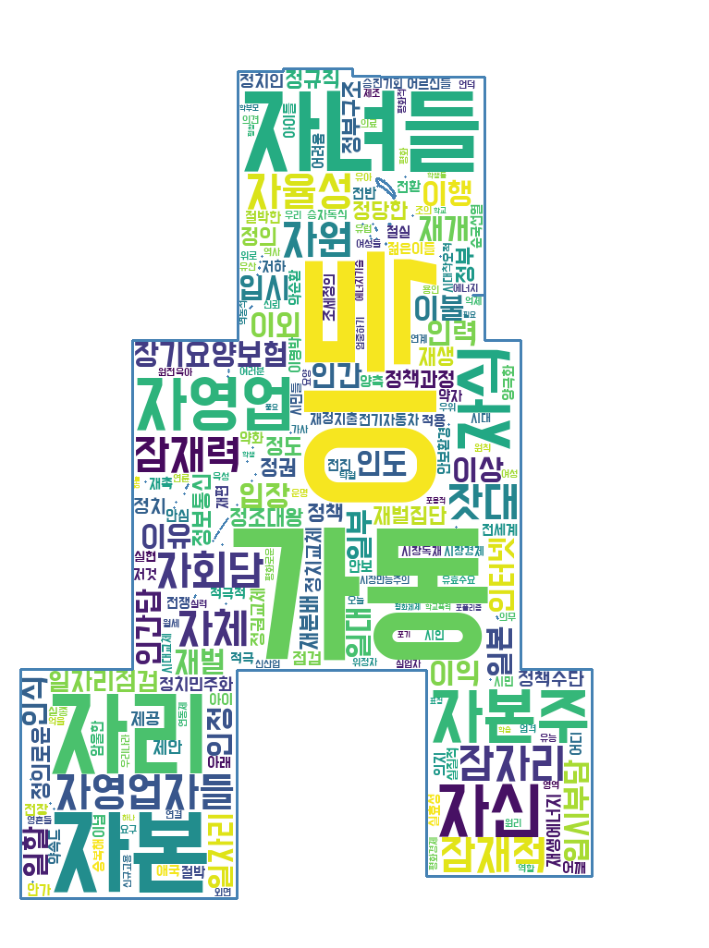

In [84]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)

In [85]:
icon = PIL.Image.open('cr7.png')

In [86]:
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
yellow = PIL.Image.new('RGB', icon.size, (255, 255, 0))

img.show()
yellow.show()
img.paste(yellow, icon)
img.show()

img = np.array(img)


In [87]:
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
contour_width=3, # 테두리 굵기
contour_color='steelblue', # 테두리 색
background_color = 'white',
mask = img) # 배경으로 사용할 이미지
type(wc)


wordcloud.wordcloud.WordCloud

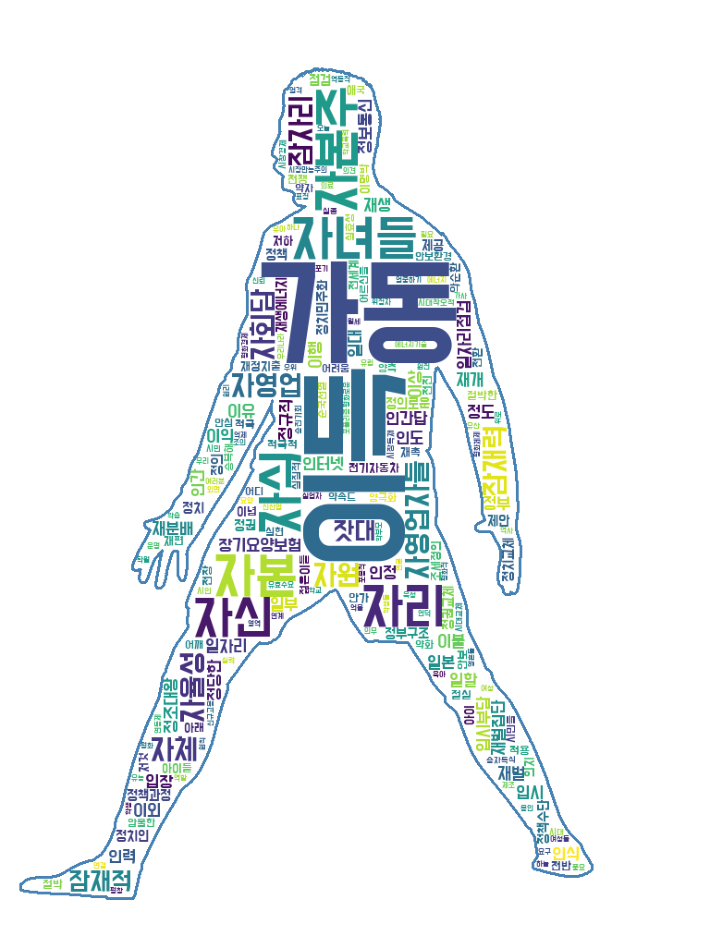

In [88]:
img_wordcloud = wc.generate_from_frequencies(dic_word)
# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)


In [89]:
import pandas as pd
df = pd.read_csv('news_comment_BTS.csv', encoding='UTF-8')

In [90]:
df.head()

,reg_time,reply,press,title,url
0,2020-09-01 22:58:09,국보소년단<U+0001F49C>,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
1,2020-09-01 09:56:46,아줌마가 들어도 좋더라,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
2,2020-09-01 09:08:06,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
3,2020-09-01 08:52:32,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!,한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...
4,2020-09-01 08:36:33,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요",한국경제,"[속보]BTS '다이너마이트', 한국 가수 최초로 빌보드 싱글 1위",https://news.naver.com/main/read.nhn?mode=LSD&...


In [91]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [93]:
import konlpy
kkma = konlpy.tag.Kkma()

In [94]:
nouns = df['reply'].apply(kkma.nouns)
nouns

0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [95]:
nouns = nouns.explode()
nouns

0          국보
0       국보소년단
0         소년단
1         아줌마
2          팩트
        ...  
1199      박지민
1199      김태형
1199        전
1199      전정국
1199       정국
Name: reply, Length: 9353, dtype: object

In [98]:
df_word = pd.DataFrame({'word' : nouns})
df_word.head()

,word
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트


In [99]:
df_word['count'] = df_word['word'].str.len()
df_word.head()

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [100]:
df_word = df_word.query('count >= 2')
df_word.head()


,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0


In [101]:
df_word = df_word.groupby('word', as_index=False) \
                  .agg(n = ('word', 'count')) \
                  .sort_values('n', ascending=False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [102]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<AxesSubplot:xlabel='n', ylabel='word'>

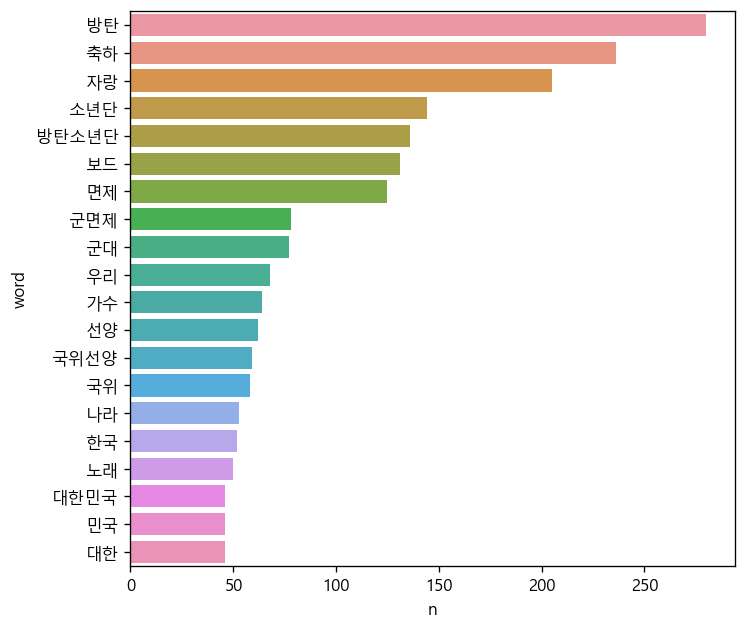

In [103]:
plt.rcParams.update({'figure.figsize' : [6.5, 6]})
sns.barplot(data=top20, y='word', x='n')

In [104]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '대한민국': 46,
 '민국': 46,
 '대한': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '정국': 29,
 '사람': 29,
 '라니': 29,
 '행복': 29,
 '사랑': 28,
 '역사': 28,
 '생일': 27,
 '코로나': 27,
 '차트': 27,
 '핫백': 26,
 '위라니': 24,
 '감사': 24,
 '축하해': 23,
 '우리나라': 23,
 '전세계': 22,
 '그룹': 22,
 '싱글': 22,
 '미국': 22,
 '이것': 22,
 '진심': 22,
 '인정': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '요즘': 19,
 '음악': 19,
 '활동': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '너희': 15,
 '국가': 15,
 '올림픽': 15,
 '이제': 15,
 '문화': 15,
 '때문': 15,
 '국민': 15,
 '뉴스': 15,
 '기분': 14,
 '숟가락': 14,
 '기사': 14,
 '멤버': 14,
 '수고': 14,
 '대통령': 14,
 '내가': 14,
 '한국인': 13,
 '아티스트': 13,
 '눈물': 13,
 '이름': 13,
 '시국': 13,
 '마이트': 12,
 '금메달': 12,
 '지금': 12,
 '아시아': 12,
 '댓글': 12,
 '친구': 11,
 '위로': 11,
 '재인': 11,
 '남자': 11,
 '싱글차트': 11,

In [112]:
wc = WordCloud(random_state=1234,
    font_path = font,
    width = 400,
    height = 400,
    background_color = 'white',
    mask = img,
    colormap = 'BuPu')


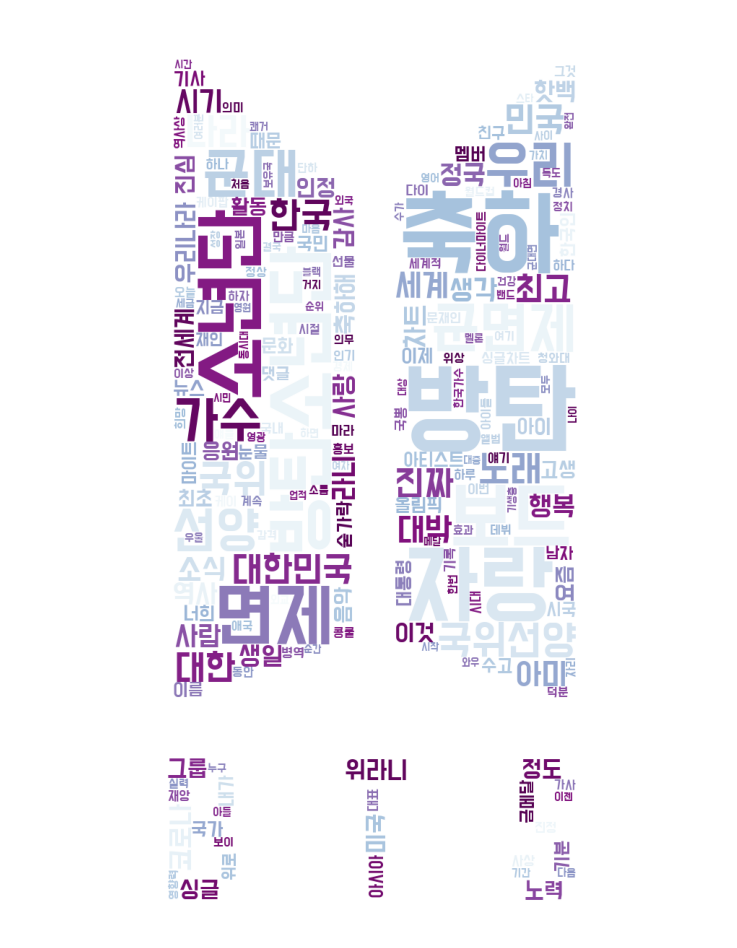

In [113]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)


In [137]:
icon = PIL.Image.open('rr.png')
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
yellow = PIL.Image.new('RGB', icon.size, (255, 255, 0))

img.paste(yellow, icon)

img = np.array(img)


ValueError: bad transparency mask

In [140]:
import re
import pandas as pd

from konlpy.tag import Okt

from konlpy.corpus import kolaw
from konlpy.corpus import kobill

In [141]:
kolaw.fileids()

['constitution.txt']

In [142]:
law = kolaw.open('constitution.txt').read()
law[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

In [143]:
kobill.fileids()

d = kobill.open('1809890.txt').read()

print(d[:400])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호

9890

발의연월일 : 2010.  11.  12.  

발  의  자 : 정의화․이명수․김을동 

이사철․여상규․안규백

황영철․박영아․김정훈

김학송 의원(10인)

제안이유 및 주요내용

  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요

한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 

수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 

자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 

이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.

  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려

는 것임(안 제63조제2항제4호).



In [144]:
len(d)

4201

In [145]:
okt = Okt()

In [146]:
nouns = okt.nouns(d)

In [147]:
dw = pd.DataFrame({'word' : nouns})
dw.head()

,word
0,지방공무원법
1,일부
2,개정
3,법률
4,안


In [148]:
dw['count'] = dw['word'].str.len()
dw.head()

,word,count
0,지방공무원법,6
1,일부,2
2,개정,2
3,법률,2
4,안,1


In [149]:
dw = dw.query('count >= 2')
dw.head()

,word,count
0,지방공무원법,6
1,일부,2
2,개정,2
3,법률,2
5,정의화,3


In [150]:
dw = dw.groupby('word', as_index=False) \
.agg(n = ('word', 'count')) \
.sort_values('n', ascending=False)
dw

,word,n
103,육아휴직,38
56,발생,19
114,이하,18
68,비용,17
7,경우,16
...,...,...
84,양립,1
83,안규백,1
82,실제,1
30,남녀,1


In [151]:
dw = dw.set_index('word').to_dict()['n']
dw

{'육아휴직': 38,
 '발생': 19,
 '이하': 18,
 '비용': 17,
 '경우': 16,
 '고용': 14,
 '자녀': 14,
 '공무원': 10,
 '월급': 9,
 '지급': 9,
 '체인': 9,
 '연령': 8,
 '급여': 8,
 '추가': 8,
 '개정': 8,
 '가정': 7,
 '법률': 7,
 '대체': 7,
 '휴직': 6,
 '자료': 6,
 '초등학교': 6,
 '다음': 5,
 '이상': 5,
 '예상': 5,
 '수식': 5,
 '확률': 5,
 '일부': 4,
 '인력': 4,
 '지방': 4,
 '지방공무원법': 4,
 '추계': 4,
 '항제': 4,
 '해당': 4,
 '현행': 4,
 '재정': 4,
 '가능': 4,
 '교육': 4,
 '현황': 3,
 '사유': 3,
 '고용노동부': 3,
 '첨부': 3,
 '신청': 3,
 '현재': 3,
 '따라서': 3,
 '취학': 3,
 '근로자': 3,
 '개정안': 3,
 '대상자': 3,
 '요가': 2,
 '국가공무원': 2,
 '의원': 2,
 '관련': 2,
 '수급': 2,
 '시행': 2,
 '임용': 2,
 '국가': 2,
 '중인': 2,
 '작성': 2,
 '양육': 2,
 '주지': 2,
 '나이': 2,
 '여부': 2,
 '출산': 2,
 '정의화': 2,
 '저학년': 2,
 '국회예산정책처': 2,
 '조정': 2,
 '인건비': 2,
 '행정안전부': 2,
 '대상': 2,
 '때문': 2,
 '것임': 2,
 '미만': 2,
 '바탕': 2,
 '확대': 2,
 '발의': 2,
 '학년': 2,
 '법령': 2,
 '평균': 2,
 '통계': 2,
 '임신': 1,
 '활용': 1,
 '규칙': 1,
 '정도': 1,
 '임금': 1,
 '일자리': 1,
 '규정': 1,
 '일용직': 1,
 '근거': 1,
 '황영철': 1,
 '작성자': 1,
 '호의': 1,
 '저하': 1,
 '현행법': 1,
 '추진': 1,
 '정리': 

In [152]:
wc = WordCloud(random_state=1234,
font_path = font,
width = 400,
height = 400,
background_color = 'white',
mask = img,
colormap = 'inferno')


AttributeError: shape

In [153]:
img_wordcloud = wc.generate_from_frequencies(dw)

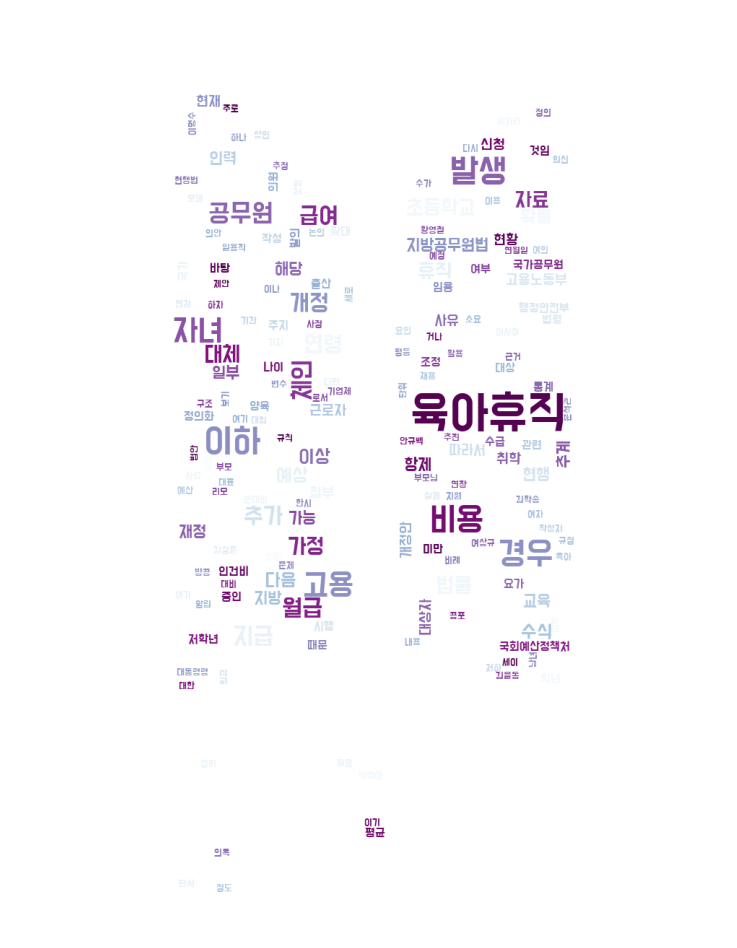

In [154]:
plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)


In [163]:
icon = PIL.Image.open('mm.png')

img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
yellow = PIL.Image.new('RGB', icon.size, (255, 255, 0))

img.paste(yellow, icon)

img.show()
img = np.array(img)

In [164]:
wc = WordCloud(random_state=1234,
    font_path = font,
    width = 400,
    height = 400,
    contour_width=3, # 테두리 굵기
    contour_color='steelblue', # 테두리 색
    background_color = 'white',
    mask = img) # 배경으로 사용할 이미지
type(wc)


wordcloud.wordcloud.WordCloud

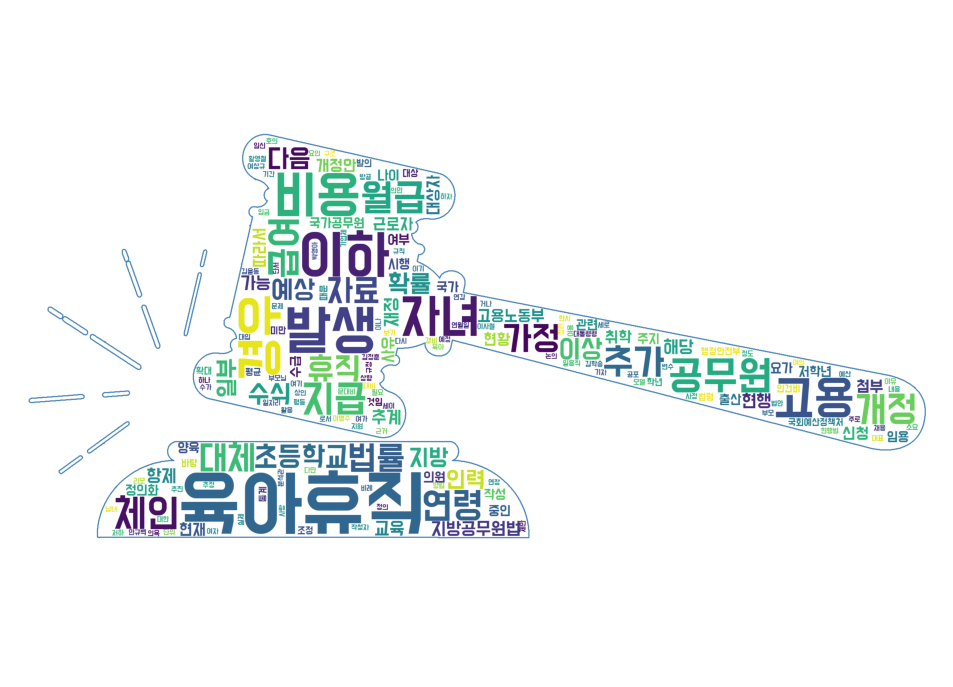

In [166]:
img_wordcloud = wc.generate_from_frequencies(dw)

plt.figure(figsize = (10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)